<a href="https://colab.research.google.com/github/FREDY129053/AI_Systems_LABS/blob/main/Lab_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лаба 3.6: Нейронные сети

In [1]:
import pandas as pd

df = pd.read_csv('/content/lab_2_ready_df.csv')
df_copy = df.copy()

print(f"Размерность датасета: {df_copy.shape}")
df_copy.head()

Размерность датасета: (19997, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,lat,long,was_renovated_post90,has_basement,viewed,sale_month,yr_built_1950_to_1975,yr_built_1975_to_1997,yr_built_1997_to_2015,yr_built_pre1950
0,221900.0,3,1,1180,5650,1.0,0,3,7,47.5112,-122.257,0,0,0,10,1.0,0.0,0.0,0.0
1,538000.0,3,2,2570,7242,2.0,0,3,7,47.7210,-122.319,1,1,0,12,1.0,0.0,0.0,0.0
2,180000.0,2,1,770,10000,1.0,0,3,6,47.7379,-122.233,0,0,0,2,0.0,0.0,0.0,1.0
3,604000.0,4,3,1960,5000,1.0,0,5,7,47.5208,-122.393,0,1,0,12,1.0,0.0,0.0,0.0
4,510000.0,3,2,1680,8080,1.0,0,3,8,47.6168,-122.045,0,0,0,2,0.0,1.0,0.0,0.0


## Разбиение данных

In [2]:
X = df_copy.drop('price', axis=1)
y = df_copy['price']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Validation set shape: X_val={X_val.shape}, y_val={y_val.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(13997, 18), y_train=(13997,)
Validation set shape: X_val=(3000, 18), y_val=(3000,)
Test set shape: X_test=(3000, 18), y_test=(3000,)


## Модели

In [4]:
rmses = {}
work_time = {}

In [5]:
import torch

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [9]:
import time

def learn_model(model, model_name="", epochs=300):
  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=0.001)

  start_time = time.perf_counter()

  for epoch in range(epochs):
      model.train()
      optimizer.zero_grad()
      outputs = model(X_train_tensor)
      loss = criterion(outputs, y_train_tensor)
      loss.backward()
      optimizer.step()

      model.eval()
      with torch.no_grad():
          val_outputs = model(X_val_tensor)
          val_loss = criterion(val_outputs, y_val_tensor)

      if (epoch + 1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

  elapsed_seconds = time.perf_counter() - start_time
  if model_name != "":
    work_time[model_name] = elapsed_seconds

In [10]:
import numpy as np

def get_test_rmse(model):

  model.eval()
  with torch.no_grad():
      y_predict_tensor = model(X_test_tensor)
      y_predict_np = y_predict_tensor.numpy()
      y_test_np = y_test_tensor.numpy()

  return np.sqrt(mean_squared_error(y_test_np, y_predict_np))

### Линейная регрессия

In [11]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error

model_lin_reg = nn.Sequential(
    nn.Linear(X_train.shape[1], 1)
)

learn_model(model_lin_reg, model_name="Линейная регрессия")

Epoch [10/300], Train Loss: 321678180352.0000, Val Loss: 313119965184.0000
Epoch [20/300], Train Loss: 321553563648.0000, Val Loss: 312997314560.0000
Epoch [30/300], Train Loss: 321428979712.0000, Val Loss: 312874827776.0000
Epoch [40/300], Train Loss: 321304428544.0000, Val Loss: 312752340992.0000
Epoch [50/300], Train Loss: 321179975680.0000, Val Loss: 312629985280.0000
Epoch [60/300], Train Loss: 321055621120.0000, Val Loss: 312507629568.0000
Epoch [70/300], Train Loss: 320931266560.0000, Val Loss: 312385372160.0000
Epoch [80/300], Train Loss: 320807043072.0000, Val Loss: 312263180288.0000
Epoch [90/300], Train Loss: 320682917888.0000, Val Loss: 312141086720.0000
Epoch [100/300], Train Loss: 320558825472.0000, Val Loss: 312019025920.0000
Epoch [110/300], Train Loss: 320434765824.0000, Val Loss: 311897030656.0000
Epoch [120/300], Train Loss: 320310870016.0000, Val Loss: 311775133696.0000
Epoch [130/300], Train Loss: 320187006976.0000, Val Loss: 311653302272.0000
Epoch [140/300], Trai

In [12]:
rmse_lin = get_test_rmse(model_lin_reg)
rmses['Линейная регрессия'] = rmse_lin
print(f"\nRMSE on the test set: {rmse_lin:.4f}")


RMSE on the test set: 553982.3142


### Нейронка 1

In [13]:
import torch.nn as nn

model_nn1 = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

learn_model(model=model_nn1, model_name="Нейронка 1(64 нейронов + ReLU)")

Epoch [10/300], Train Loss: 321064468480.0000, Val Loss: 312491409408.0000
Epoch [20/300], Train Loss: 320641925120.0000, Val Loss: 312070373376.0000
Epoch [30/300], Train Loss: 320146702336.0000, Val Loss: 311574462464.0000
Epoch [40/300], Train Loss: 319547211776.0000, Val Loss: 310972645376.0000
Epoch [50/300], Train Loss: 318820843520.0000, Val Loss: 310244868096.0000
Epoch [60/300], Train Loss: 317959536640.0000, Val Loss: 309383430144.0000
Epoch [70/300], Train Loss: 316954378240.0000, Val Loss: 308379844608.0000
Epoch [80/300], Train Loss: 315801927680.0000, Val Loss: 307231916032.0000
Epoch [90/300], Train Loss: 314498088960.0000, Val Loss: 305934336000.0000
Epoch [100/300], Train Loss: 313031229440.0000, Val Loss: 304474456064.0000
Epoch [110/300], Train Loss: 311387291648.0000, Val Loss: 302836973568.0000
Epoch [120/300], Train Loss: 309559099392.0000, Val Loss: 301016219648.0000
Epoch [130/300], Train Loss: 307543572480.0000, Val Loss: 299011702784.0000
Epoch [140/300], Trai

In [14]:
rmse_nn1 = get_test_rmse(model_nn1)
rmses['Нейронка 1(64 нейронов + ReLU)'] = rmse_nn1
print(f"\nRMSE on the test set: {rmse_nn1:.4f}")


RMSE on the test set: 492477.4342


### Нейронка 2

In [15]:
import torch.nn as nn

model_nn2 = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

model_name = 'Нейронка 2(128 нейронов + ReLU)'

learn_model(model=model_nn2, model_name=model_name)

rmse_nn2 = get_test_rmse(model_nn2)
rmses[model_name] = rmse_nn2
print(f"\nRMSE on the test set: {rmse_nn2:.4f}")

Epoch [10/300], Train Loss: 319834324992.0000, Val Loss: 311200382976.0000
Epoch [20/300], Train Loss: 318578196480.0000, Val Loss: 309955624960.0000
Epoch [30/300], Train Loss: 317199777792.0000, Val Loss: 308584284160.0000
Epoch [40/300], Train Loss: 315636645888.0000, Val Loss: 307024691200.0000
Epoch [50/300], Train Loss: 313829556224.0000, Val Loss: 305217929216.0000
Epoch [60/300], Train Loss: 311722442752.0000, Val Loss: 303109046272.0000
Epoch [70/300], Train Loss: 309269954560.0000, Val Loss: 300656427008.0000
Epoch [80/300], Train Loss: 306442797056.0000, Val Loss: 297833005056.0000
Epoch [90/300], Train Loss: 303225831424.0000, Val Loss: 294622199808.0000
Epoch [100/300], Train Loss: 299598774272.0000, Val Loss: 291002155008.0000
Epoch [110/300], Train Loss: 295541833728.0000, Val Loss: 286952718336.0000
Epoch [120/300], Train Loss: 291062710272.0000, Val Loss: 282482737152.0000
Epoch [130/300], Train Loss: 286186307584.0000, Val Loss: 277621243904.0000
Epoch [140/300], Trai

### Нейронка 3

In [16]:
import torch.nn as nn

model_nn3 = nn.Sequential(
    nn.Linear(X_train.shape[1], 256),
    nn.ReLU(),
    nn.Linear(256, 1)
)
name = 'Нейронка 3(256 нейронов + ReLU)'
learn_model(model=model_nn3, model_name=name)

rmse_nn3 = get_test_rmse(model_nn3)
rmses[name] = rmse_nn3
print(f"\nRMSE on the test set: {rmse_nn3:.4f}")

Epoch [10/300], Train Loss: 321366523904.0000, Val Loss: 312636309504.0000
Epoch [20/300], Train Loss: 319393955840.0000, Val Loss: 310687137792.0000
Epoch [30/300], Train Loss: 317269049344.0000, Val Loss: 308574846976.0000
Epoch [40/300], Train Loss: 314867810304.0000, Val Loss: 306177540096.0000
Epoch [50/300], Train Loss: 312071323648.0000, Val Loss: 303379546112.0000
Epoch [60/300], Train Loss: 308765622272.0000, Val Loss: 300068175872.0000
Epoch [70/300], Train Loss: 304846307328.0000, Val Loss: 296141193216.0000
Epoch [80/300], Train Loss: 300216287232.0000, Val Loss: 291502587904.0000
Epoch [90/300], Train Loss: 294798295040.0000, Val Loss: 286072176640.0000
Epoch [100/300], Train Loss: 288542720000.0000, Val Loss: 279806640128.0000
Epoch [110/300], Train Loss: 281476399104.0000, Val Loss: 272736321536.0000
Epoch [120/300], Train Loss: 273701945344.0000, Val Loss: 264965832704.0000
Epoch [130/300], Train Loss: 265365143552.0000, Val Loss: 256639156224.0000
Epoch [140/300], Trai

### Нейронка 4

In [17]:
import torch.nn as nn

model_nn4 = nn.Sequential(
    nn.Linear(X_train.shape[1], 512),
    nn.ReLU(),
    nn.Linear(512, 1)
)

name = 'Нейронка 4(512 нейронов + ReLU)'
learn_model(model=model_nn4, model_name=name)

rmse_nn4 = get_test_rmse(model_nn4)
rmses[name] = rmse_nn4
print(f"\nRMSE on the test set: {rmse_nn4:.4f}")

Epoch [10/300], Train Loss: 318751506432.0000, Val Loss: 309887074304.0000
Epoch [20/300], Train Loss: 314932559872.0000, Val Loss: 306106531840.0000
Epoch [30/300], Train Loss: 310769123328.0000, Val Loss: 301956857856.0000
Epoch [40/300], Train Loss: 305977196544.0000, Val Loss: 297156968448.0000
Epoch [50/300], Train Loss: 300302336000.0000, Val Loss: 291461496832.0000
Epoch [60/300], Train Loss: 293557534720.0000, Val Loss: 284688809984.0000
Epoch [70/300], Train Loss: 285614145536.0000, Val Loss: 276712652800.0000
Epoch [80/300], Train Loss: 276408729600.0000, Val Loss: 267471667200.0000
Epoch [90/300], Train Loss: 265983148032.0000, Val Loss: 257008435200.0000
Epoch [100/300], Train Loss: 254514413568.0000, Val Loss: 245502345216.0000
Epoch [110/300], Train Loss: 242330730496.0000, Val Loss: 233279733760.0000
Epoch [120/300], Train Loss: 229855313920.0000, Val Loss: 220759212032.0000
Epoch [130/300], Train Loss: 217569837056.0000, Val Loss: 208404938752.0000
Epoch [140/300], Trai

### Нейронка 5

In [18]:
import torch.nn as nn

model_nn5 = nn.Sequential(
    nn.Linear(X_train.shape[1], 1024),
    nn.ReLU(),
    nn.Linear(1024, 1)
)
name = 'Нейронка 5(1024 нейронов + ReLU)'
learn_model(model=model_nn5, model_name=name)

rmse_nn5 = get_test_rmse(model_nn5)
rmses[name] = rmse_nn5
print(f"\nRMSE on the test set: {rmse_nn5:.4f}")

Epoch [10/300], Train Loss: 315395538944.0000, Val Loss: 306268471296.0000
Epoch [20/300], Train Loss: 308254113792.0000, Val Loss: 299181604864.0000
Epoch [30/300], Train Loss: 300348145664.0000, Val Loss: 291276718080.0000
Epoch [40/300], Train Loss: 291206496256.0000, Val Loss: 282098106368.0000
Epoch [50/300], Train Loss: 280540413952.0000, Val Loss: 271372337152.0000
Epoch [60/300], Train Loss: 268252708864.0000, Val Loss: 259006824448.0000
Epoch [70/300], Train Loss: 254440603648.0000, Val Loss: 245102821376.0000
Epoch [80/300], Train Loss: 239450685440.0000, Val Loss: 230005882880.0000
Epoch [90/300], Train Loss: 223859834880.0000, Val Loss: 214284599296.0000
Epoch [100/300], Train Loss: 208458498048.0000, Val Loss: 198715146240.0000
Epoch [110/300], Train Loss: 194177253376.0000, Val Loss: 184217927680.0000
Epoch [120/300], Train Loss: 181920268288.0000, Val Loss: 171691147264.0000
Epoch [130/300], Train Loss: 172373491712.0000, Val Loss: 161820852224.0000
Epoch [140/300], Trai

### Нейронка 6

In [19]:
import torch.nn as nn

model_nn6 = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.Sigmoid(),
    nn.Linear(64, 1)
)
name = 'Нейронка 6(64 нейронов + Sigmoid)'
learn_model(model=model_nn6, model_name=name)

rmse_nn6 = get_test_rmse(model_nn6)
rmses[name] = rmse_nn6
print(f"\nRMSE on the test set: {rmse_nn6:.4f}")

Epoch [10/300], Train Loss: 321919516672.0000, Val Loss: 313370247168.0000
Epoch [20/300], Train Loss: 321919090688.0000, Val Loss: 313369821184.0000
Epoch [30/300], Train Loss: 321918533632.0000, Val Loss: 313369231360.0000
Epoch [40/300], Train Loss: 321918042112.0000, Val Loss: 313368739840.0000
Epoch [50/300], Train Loss: 321917485056.0000, Val Loss: 313368248320.0000
Epoch [60/300], Train Loss: 321916993536.0000, Val Loss: 313367691264.0000
Epoch [70/300], Train Loss: 321916534784.0000, Val Loss: 313367265280.0000
Epoch [80/300], Train Loss: 321916108800.0000, Val Loss: 313366839296.0000
Epoch [90/300], Train Loss: 321915650048.0000, Val Loss: 313366446080.0000
Epoch [100/300], Train Loss: 321915256832.0000, Val Loss: 313366020096.0000
Epoch [110/300], Train Loss: 321914863616.0000, Val Loss: 313365626880.0000
Epoch [120/300], Train Loss: 321914470400.0000, Val Loss: 313365233664.0000
Epoch [130/300], Train Loss: 321914077184.0000, Val Loss: 313364873216.0000
Epoch [140/300], Trai

### Нейронка 7

In [20]:
import torch.nn as nn

model_nn7 = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.Sigmoid(),
    nn.Linear(128, 1)
)

name = 'Нейронка 7(128 нейронов + Sigmoid)'
learn_model(model=model_nn7, model_name=name)

rmse_nn7 = get_test_rmse(model_nn7)
rmses[name] = rmse_nn7
print(f"\nRMSE on the test set: {rmse_nn7:.4f}")

Epoch [10/300], Train Loss: 321918697472.0000, Val Loss: 313369329664.0000
Epoch [20/300], Train Loss: 321917943808.0000, Val Loss: 313368608768.0000
Epoch [30/300], Train Loss: 321917157376.0000, Val Loss: 313367855104.0000
Epoch [40/300], Train Loss: 321916305408.0000, Val Loss: 313367003136.0000
Epoch [50/300], Train Loss: 321915420672.0000, Val Loss: 313366151168.0000
Epoch [60/300], Train Loss: 321914372096.0000, Val Loss: 313365135360.0000
Epoch [70/300], Train Loss: 321913323520.0000, Val Loss: 313364021248.0000
Epoch [80/300], Train Loss: 321912176640.0000, Val Loss: 313362907136.0000
Epoch [90/300], Train Loss: 321911062528.0000, Val Loss: 313361760256.0000
Epoch [100/300], Train Loss: 321909915648.0000, Val Loss: 313360646144.0000
Epoch [110/300], Train Loss: 321908834304.0000, Val Loss: 313359532032.0000
Epoch [120/300], Train Loss: 321907752960.0000, Val Loss: 313358516224.0000
Epoch [130/300], Train Loss: 321906769920.0000, Val Loss: 313357533184.0000
Epoch [140/300], Trai

### Нейронка 8

In [21]:
import torch.nn as nn

model_nn8 = nn.Sequential(
    nn.Linear(X_train.shape[1], 256),
    nn.Sigmoid(),
    nn.Linear(256, 1)
)
name = 'Нейронка 8(256 нейронов + Sigmoid)'
learn_model(model=model_nn8, model_name=name)

rmse_nn8 = get_test_rmse(model_nn8)
rmses[name] = rmse_nn8
print(f"\nRMSE on the test set: {rmse_nn8:.4f}")

Epoch [10/300], Train Loss: 321918271488.0000, Val Loss: 313368903680.0000
Epoch [20/300], Train Loss: 321916731392.0000, Val Loss: 313367363584.0000
Epoch [30/300], Train Loss: 321915191296.0000, Val Loss: 313365856256.0000
Epoch [40/300], Train Loss: 321913651200.0000, Val Loss: 313364316160.0000
Epoch [50/300], Train Loss: 321912045568.0000, Val Loss: 313362743296.0000
Epoch [60/300], Train Loss: 321910407168.0000, Val Loss: 313361072128.0000
Epoch [70/300], Train Loss: 321908670464.0000, Val Loss: 313359368192.0000
Epoch [80/300], Train Loss: 321906900992.0000, Val Loss: 313357631488.0000
Epoch [90/300], Train Loss: 321905131520.0000, Val Loss: 313355829248.0000
Epoch [100/300], Train Loss: 321903263744.0000, Val Loss: 313353994240.0000
Epoch [110/300], Train Loss: 321901363200.0000, Val Loss: 313352126464.0000
Epoch [120/300], Train Loss: 321899462656.0000, Val Loss: 313350193152.0000
Epoch [130/300], Train Loss: 321897562112.0000, Val Loss: 313348358144.0000
Epoch [140/300], Trai

### Нейронка 9

In [22]:
import torch.nn as nn

model_nn9 = nn.Sequential(
    nn.Linear(X_train.shape[1], 512),
    nn.Sigmoid(),
    nn.Linear(512, 1)
)
name='Нейронка 9(512 нейронов + Sigmoid)'
learn_model(model=model_nn9, model_name=name)

rmse_nn9 = get_test_rmse(model_nn9)
rmses[name] = rmse_nn9
print(f"\nRMSE on the test set: {rmse_nn9:.4f}")

Epoch [10/300], Train Loss: 321918107648.0000, Val Loss: 313368576000.0000
Epoch [20/300], Train Loss: 321915158528.0000, Val Loss: 313365626880.0000
Epoch [30/300], Train Loss: 321912045568.0000, Val Loss: 313362546688.0000
Epoch [40/300], Train Loss: 321908736000.0000, Val Loss: 313359269888.0000
Epoch [50/300], Train Loss: 321905262592.0000, Val Loss: 313355862016.0000
Epoch [60/300], Train Loss: 321901592576.0000, Val Loss: 313352126464.0000
Epoch [70/300], Train Loss: 321897594880.0000, Val Loss: 313348194304.0000
Epoch [80/300], Train Loss: 321893433344.0000, Val Loss: 313344065536.0000
Epoch [90/300], Train Loss: 321889239040.0000, Val Loss: 313339936768.0000
Epoch [100/300], Train Loss: 321885044736.0000, Val Loss: 313335775232.0000
Epoch [110/300], Train Loss: 321880948736.0000, Val Loss: 313331679232.0000
Epoch [120/300], Train Loss: 321876918272.0000, Val Loss: 313327714304.0000
Epoch [130/300], Train Loss: 321872920576.0000, Val Loss: 313323716608.0000
Epoch [140/300], Trai

### Нейронка 10

In [23]:
import torch.nn as nn

model_nn10 = nn.Sequential(
    nn.Linear(X_train.shape[1], 1024),
    nn.Sigmoid(),
    nn.Linear(1024, 1)
)
name = 'Нейронка 10(1024 нейронов + Sigmoid)'
learn_model(model=model_nn10, model_name=name)

rmse_nn10 = get_test_rmse(model_nn10)
rmses[name] = rmse_nn10
print(f"\nRMSE on the test set: {rmse_nn10:.4f}")

Epoch [10/300], Train Loss: 321914896384.0000, Val Loss: 313365135360.0000
Epoch [20/300], Train Loss: 321909260288.0000, Val Loss: 313359532032.0000
Epoch [30/300], Train Loss: 321903296512.0000, Val Loss: 313353666560.0000
Epoch [40/300], Train Loss: 321897103360.0000, Val Loss: 313347473408.0000
Epoch [50/300], Train Loss: 321890353152.0000, Val Loss: 313340723200.0000
Epoch [60/300], Train Loss: 321882947584.0000, Val Loss: 313333350400.0000
Epoch [70/300], Train Loss: 321874984960.0000, Val Loss: 313325453312.0000
Epoch [80/300], Train Loss: 321866563584.0000, Val Loss: 313317064704.0000
Epoch [90/300], Train Loss: 321857781760.0000, Val Loss: 313308348416.0000
Epoch [100/300], Train Loss: 321848672256.0000, Val Loss: 313299304448.0000
Epoch [110/300], Train Loss: 321839661056.0000, Val Loss: 313290358784.0000
Epoch [120/300], Train Loss: 321830748160.0000, Val Loss: 313281478656.0000
Epoch [130/300], Train Loss: 321821966336.0000, Val Loss: 313272827904.0000
Epoch [140/300], Trai

### Нейронка 11

In [24]:
import torch.nn as nn

model_nn11 = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)
name='Нейронка 11((64 нейронов)*2 + ReLU)'
learn_model(model=model_nn11, model_name=name)

rmse_nn11 = get_test_rmse(model_nn11)
rmses[name] = rmse_nn11
print(f"\nRMSE on the test set: {rmse_nn11:.4f}")

Epoch [10/300], Train Loss: 320938344448.0000, Val Loss: 312297586688.0000
Epoch [20/300], Train Loss: 319660392448.0000, Val Loss: 310996238336.0000
Epoch [30/300], Train Loss: 317776363520.0000, Val Loss: 309067284480.0000
Epoch [40/300], Train Loss: 314950057984.0000, Val Loss: 306172329984.0000
Epoch [50/300], Train Loss: 310769352704.0000, Val Loss: 301898235904.0000
Epoch [60/300], Train Loss: 304795549696.0000, Val Loss: 295808532480.0000
Epoch [70/300], Train Loss: 296591523840.0000, Val Loss: 287475400704.0000
Epoch [80/300], Train Loss: 285816455168.0000, Val Loss: 276557398016.0000
Epoch [90/300], Train Loss: 272196141056.0000, Val Loss: 262777503744.0000
Epoch [100/300], Train Loss: 255817089024.0000, Val Loss: 246242869248.0000
Epoch [110/300], Train Loss: 237340327936.0000, Val Loss: 227619225600.0000
Epoch [120/300], Train Loss: 217962741760.0000, Val Loss: 208087367680.0000
Epoch [130/300], Train Loss: 199365984256.0000, Val Loss: 189296525312.0000
Epoch [140/300], Trai

### Нейронка 12

In [25]:
import torch.nn as nn

model_nn12 = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)
name='Нейронка 12((128 нейронов)*2 + ReLU)'
learn_model(model=model_nn12, model_name=name)

rmse_nn12 = get_test_rmse(model_nn12)
rmses[name] = rmse_nn12
print(f"\nRMSE on the test set: {rmse_nn12:.4f}")

Epoch [10/300], Train Loss: 319861129216.0000, Val Loss: 311113056256.0000
Epoch [20/300], Train Loss: 316801351680.0000, Val Loss: 307945799680.0000
Epoch [30/300], Train Loss: 311843913728.0000, Val Loss: 302836252672.0000
Epoch [40/300], Train Loss: 304124690432.0000, Val Loss: 294904561664.0000
Epoch [50/300], Train Loss: 292700979200.0000, Val Loss: 283212054528.0000
Epoch [60/300], Train Loss: 276810727424.0000, Val Loss: 267008540672.0000
Epoch [70/300], Train Loss: 256266780672.0000, Val Loss: 246133800960.0000
Epoch [80/300], Train Loss: 231960264704.0000, Val Loss: 221489725440.0000
Epoch [90/300], Train Loss: 206163001344.0000, Val Loss: 195348004864.0000
Epoch [100/300], Train Loss: 183076093952.0000, Val Loss: 171927830528.0000
Epoch [110/300], Train Loss: 167260782592.0000, Val Loss: 155649933312.0000
Epoch [120/300], Train Loss: 159574736896.0000, Val Loss: 147308707840.0000
Epoch [130/300], Train Loss: 155703787520.0000, Val Loss: 142984593408.0000
Epoch [140/300], Trai

### Нейронка 13

In [26]:
import torch.nn as nn

model_nn13 = nn.Sequential(
    nn.Linear(X_train.shape[1], 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 1)
)
name='Нейронка 13((256 нейронов)*2 + ReLU)'
learn_model(model=model_nn13, model_name=name)

rmse_nn13 = get_test_rmse(model_nn13)
rmses[name] = rmse_nn13
print(f"\nRMSE on the test set: {rmse_nn13:.4f}")

Epoch [10/300], Train Loss: 314801291264.0000, Val Loss: 305460248576.0000
Epoch [20/300], Train Loss: 302791983104.0000, Val Loss: 292956012544.0000
Epoch [30/300], Train Loss: 283185381376.0000, Val Loss: 272688955392.0000
Epoch [40/300], Train Loss: 254971068416.0000, Val Loss: 243721093120.0000
Epoch [50/300], Train Loss: 220911910912.0000, Val Loss: 208961454080.0000
Epoch [60/300], Train Loss: 190332010496.0000, Val Loss: 177854971904.0000
Epoch [70/300], Train Loss: 175085043712.0000, Val Loss: 161782136832.0000
Epoch [80/300], Train Loss: 170485940224.0000, Val Loss: 156090023936.0000
Epoch [90/300], Train Loss: 163350544384.0000, Val Loss: 149711929344.0000
Epoch [100/300], Train Loss: 155778301952.0000, Val Loss: 143361654784.0000
Epoch [110/300], Train Loss: 148240285696.0000, Val Loss: 136326553600.0000
Epoch [120/300], Train Loss: 140337430528.0000, Val Loss: 128736051200.0000
Epoch [130/300], Train Loss: 132436336640.0000, Val Loss: 121292791808.0000
Epoch [140/300], Trai

### Нейронка 14

In [27]:
import torch.nn as nn

model_nn14 = nn.Sequential(
    nn.Linear(X_train.shape[1], 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 1)
)
name='Нейронка 14((512 нейронов)*2 + ReLU)'
learn_model(model=model_nn14, model_name=name)

rmse_nn14 = get_test_rmse(model_nn14)
rmses[name] = rmse_nn14
print(f"\nRMSE on the test set: {rmse_nn14:.4f}")

Epoch [10/300], Train Loss: 304304062464.0000, Val Loss: 293480759296.0000
Epoch [20/300], Train Loss: 270972223488.0000, Val Loss: 258773352448.0000
Epoch [30/300], Train Loss: 223890685952.0000, Val Loss: 210558763008.0000
Epoch [40/300], Train Loss: 183168335872.0000, Val Loss: 169647833088.0000
Epoch [50/300], Train Loss: 173103579136.0000, Val Loss: 158137155584.0000
Epoch [60/300], Train Loss: 162843410432.0000, Val Loss: 148292714496.0000
Epoch [70/300], Train Loss: 150145482752.0000, Val Loss: 137880600576.0000
Epoch [80/300], Train Loss: 135831478272.0000, Val Loss: 124041273344.0000
Epoch [90/300], Train Loss: 118595731456.0000, Val Loss: 107344035840.0000
Epoch [100/300], Train Loss: 98815950848.0000, Val Loss: 88870100992.0000
Epoch [110/300], Train Loss: 78701953024.0000, Val Loss: 70653108224.0000
Epoch [120/300], Train Loss: 61934317568.0000, Val Loss: 55935127552.0000
Epoch [130/300], Train Loss: 50053492736.0000, Val Loss: 45877571584.0000
Epoch [140/300], Train Loss: 

### Нейронка 15

In [28]:
import torch.nn as nn

model_nn15 = nn.Sequential(
    nn.Linear(X_train.shape[1], 1024),
    nn.ReLU(),
    nn.Linear(1024, 1024),
    nn.ReLU(),
    nn.Linear(1024, 1)
)
name='Нейронка 15((1024 нейронов)*2 + ReLU)'
learn_model(model=model_nn15, model_name=name)

rmse_nn15 = get_test_rmse(model_nn15)
rmses[name] = rmse_nn15
print(f"\nRMSE on the test set: {rmse_nn15:.4f}")

Epoch [10/300], Train Loss: 277437120512.0000, Val Loss: 262750126080.0000
Epoch [20/300], Train Loss: 205798834176.0000, Val Loss: 190164910080.0000
Epoch [30/300], Train Loss: 182905978880.0000, Val Loss: 167362854912.0000
Epoch [40/300], Train Loss: 169641345024.0000, Val Loss: 154450067456.0000
Epoch [50/300], Train Loss: 155643904000.0000, Val Loss: 143471837184.0000
Epoch [60/300], Train Loss: 136315658240.0000, Val Loss: 123714797568.0000
Epoch [70/300], Train Loss: 111464931328.0000, Val Loss: 99848093696.0000
Epoch [80/300], Train Loss: 81128800256.0000, Val Loss: 72067350528.0000
Epoch [90/300], Train Loss: 53703569408.0000, Val Loss: 48092282880.0000
Epoch [100/300], Train Loss: 42357833728.0000, Val Loss: 40007823360.0000
Epoch [110/300], Train Loss: 43182497792.0000, Val Loss: 41097527296.0000
Epoch [120/300], Train Loss: 42307706880.0000, Val Loss: 40083648512.0000
Epoch [130/300], Train Loss: 42032136192.0000, Val Loss: 39796944896.0000
Epoch [140/300], Train Loss: 42017

### Нейронка 16

In [29]:
import torch.nn as nn

model_nn16 = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.Sigmoid(),
    nn.Linear(64, 64),
    nn.Sigmoid(),
    nn.Linear(64, 1)
)
name='Нейронка 16((64 нейронов)*2 + Sigmoid)'
learn_model(model=model_nn16, model_name=name)

rmse_nn16 = get_test_rmse(model_nn16)
rmses[name] = rmse_nn16
print(f"\nRMSE on the test set: {rmse_nn16:.4f}")

Epoch [10/300], Train Loss: 321919418368.0000, Val Loss: 313370148864.0000
Epoch [20/300], Train Loss: 321918795776.0000, Val Loss: 313369493504.0000
Epoch [30/300], Train Loss: 321918238720.0000, Val Loss: 313368903680.0000
Epoch [40/300], Train Loss: 321917583360.0000, Val Loss: 313368281088.0000
Epoch [50/300], Train Loss: 321916928000.0000, Val Loss: 313367625728.0000
Epoch [60/300], Train Loss: 321916338176.0000, Val Loss: 313367068672.0000
Epoch [70/300], Train Loss: 321915781120.0000, Val Loss: 313366511616.0000
Epoch [80/300], Train Loss: 321915191296.0000, Val Loss: 313365954560.0000
Epoch [90/300], Train Loss: 321914667008.0000, Val Loss: 313365364736.0000
Epoch [100/300], Train Loss: 321914077184.0000, Val Loss: 313364807680.0000
Epoch [110/300], Train Loss: 321913454592.0000, Val Loss: 313364217856.0000
Epoch [120/300], Train Loss: 321912864768.0000, Val Loss: 313363595264.0000
Epoch [130/300], Train Loss: 321912209408.0000, Val Loss: 313362972672.0000
Epoch [140/300], Trai

### Нерйонка 17

In [30]:
import torch.nn as nn

model_nn17 = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.Sigmoid(),
    nn.Linear(128, 128),
    nn.Sigmoid(),
    nn.Linear(128, 1)
)
name='Нейронка 17((128 нейронов)*2 + Sigmoid)'
learn_model(model=model_nn17, model_name=name)

rmse_nn17 = get_test_rmse(model_nn17)
rmses[name] = rmse_nn17
print(f"\nRMSE on the test set: {rmse_nn17:.4f}")

Epoch [10/300], Train Loss: 321918599168.0000, Val Loss: 313369231360.0000
Epoch [20/300], Train Loss: 321917190144.0000, Val Loss: 313367822336.0000
Epoch [30/300], Train Loss: 321915879424.0000, Val Loss: 313366544384.0000
Epoch [40/300], Train Loss: 321914699776.0000, Val Loss: 313365430272.0000
Epoch [50/300], Train Loss: 321913618432.0000, Val Loss: 313364348928.0000
Epoch [60/300], Train Loss: 321912569856.0000, Val Loss: 313363267584.0000
Epoch [70/300], Train Loss: 321911521280.0000, Val Loss: 313362186240.0000
Epoch [80/300], Train Loss: 321910439936.0000, Val Loss: 313361137664.0000
Epoch [90/300], Train Loss: 321909358592.0000, Val Loss: 313360089088.0000
Epoch [100/300], Train Loss: 321908244480.0000, Val Loss: 313359040512.0000
Epoch [110/300], Train Loss: 321907130368.0000, Val Loss: 313357860864.0000
Epoch [120/300], Train Loss: 321905950720.0000, Val Loss: 313356713984.0000
Epoch [130/300], Train Loss: 321904771072.0000, Val Loss: 313355534336.0000
Epoch [140/300], Trai

### Нейронка 18

In [31]:
import torch.nn as nn

model_nn18 = nn.Sequential(
    nn.Linear(X_train.shape[1], 256),
    nn.Sigmoid(),
    nn.Linear(256, 256),
    nn.Sigmoid(),
    nn.Linear(256, 1)
)
name='Нейронка 18((256 нейронов)*2 + Sigmoid)'
learn_model(model=model_nn18, model_name=name)

rmse_nn18 = get_test_rmse(model_nn18)
rmses[name] = rmse_nn18
print(f"\nRMSE on the test set: {rmse_nn18:.4f}")

Epoch [10/300], Train Loss: 321916534784.0000, Val Loss: 313366970368.0000
Epoch [20/300], Train Loss: 321913913344.0000, Val Loss: 313364512768.0000
Epoch [30/300], Train Loss: 321911947264.0000, Val Loss: 313362579456.0000
Epoch [40/300], Train Loss: 321910079488.0000, Val Loss: 313360777216.0000
Epoch [50/300], Train Loss: 321908244480.0000, Val Loss: 313358909440.0000
Epoch [60/300], Train Loss: 321906376704.0000, Val Loss: 313357008896.0000
Epoch [70/300], Train Loss: 321904345088.0000, Val Loss: 313355042816.0000
Epoch [80/300], Train Loss: 321902379008.0000, Val Loss: 313353109504.0000
Epoch [90/300], Train Loss: 321900347392.0000, Val Loss: 313351143424.0000
Epoch [100/300], Train Loss: 321898283008.0000, Val Loss: 313349013504.0000
Epoch [110/300], Train Loss: 321896153088.0000, Val Loss: 313346916352.0000
Epoch [120/300], Train Loss: 321894023168.0000, Val Loss: 313344786432.0000
Epoch [130/300], Train Loss: 321891794944.0000, Val Loss: 313342590976.0000
Epoch [140/300], Trai

### Нейронка 19

In [32]:
import torch.nn as nn

model_nn19 = nn.Sequential(
    nn.Linear(X_train.shape[1], 512),
    nn.Sigmoid(),
    nn.Linear(512, 512),
    nn.Sigmoid(),
    nn.Linear(512, 1)
)
name='Нейронка 19((512 нейронов)*2 + Sigmoid)'
learn_model(model=model_nn19, model_name=name)

rmse_nn19 = get_test_rmse(model_nn19)
rmses[name] = rmse_nn19
print(f"\nRMSE on the test set: {rmse_nn19:.4f}")

Epoch [10/300], Train Loss: 321913159680.0000, Val Loss: 313363496960.0000
Epoch [20/300], Train Loss: 321909096448.0000, Val Loss: 313359630336.0000
Epoch [30/300], Train Loss: 321905655808.0000, Val Loss: 313356189696.0000
Epoch [40/300], Train Loss: 321902149632.0000, Val Loss: 313352683520.0000
Epoch [50/300], Train Loss: 321898545152.0000, Val Loss: 313349144576.0000
Epoch [60/300], Train Loss: 321894940672.0000, Val Loss: 313345572864.0000
Epoch [70/300], Train Loss: 321891172352.0000, Val Loss: 313341870080.0000
Epoch [80/300], Train Loss: 321887371264.0000, Val Loss: 313338036224.0000
Epoch [90/300], Train Loss: 321883406336.0000, Val Loss: 313334136832.0000
Epoch [100/300], Train Loss: 321879375872.0000, Val Loss: 313330139136.0000
Epoch [110/300], Train Loss: 321875312640.0000, Val Loss: 313326075904.0000
Epoch [120/300], Train Loss: 321871151104.0000, Val Loss: 313321979904.0000
Epoch [130/300], Train Loss: 321867022336.0000, Val Loss: 313317851136.0000
Epoch [140/300], Trai

### Нейронка 20

In [33]:
import torch.nn as nn

model_nn20 = nn.Sequential(
    nn.Linear(X_train.shape[1], 1024),
    nn.Sigmoid(),
    nn.Linear(1024, 1024),
    nn.Sigmoid(),
    nn.Linear(1024, 1)
)
name='Нейронка 20((1024 нейронов)*2 + Sigmoid)'
learn_model(model=model_nn20, model_name=name)

rmse_nn20 = get_test_rmse(model_nn20)
rmses[name] = rmse_nn20
print(f"\nRMSE on the test set: {rmse_nn20:.4f}")

Epoch [10/300], Train Loss: 321906868224.0000, Val Loss: 313357074432.0000
Epoch [20/300], Train Loss: 321900314624.0000, Val Loss: 313350651904.0000
Epoch [30/300], Train Loss: 321893859328.0000, Val Loss: 313344196608.0000
Epoch [40/300], Train Loss: 321887240192.0000, Val Loss: 313337675776.0000
Epoch [50/300], Train Loss: 321880555520.0000, Val Loss: 313331056640.0000
Epoch [60/300], Train Loss: 321873739776.0000, Val Loss: 313324273664.0000
Epoch [70/300], Train Loss: 321866727424.0000, Val Loss: 313317294080.0000
Epoch [80/300], Train Loss: 321859616768.0000, Val Loss: 313310281728.0000
Epoch [90/300], Train Loss: 321852375040.0000, Val Loss: 313303040000.0000
Epoch [100/300], Train Loss: 321845067776.0000, Val Loss: 313295863808.0000
Epoch [110/300], Train Loss: 321837531136.0000, Val Loss: 313288327168.0000
Epoch [120/300], Train Loss: 321829699584.0000, Val Loss: 313280528384.0000
Epoch [130/300], Train Loss: 321821573120.0000, Val Loss: 313272500224.0000
Epoch [140/300], Trai

## Результаты разных настроек

In [34]:
from prettytable import PrettyTable

table = PrettyTable()
table.title = "Обучение нейронных сетей на 300 эпох без scale датасета"
table.field_names = ["Конфигурация модели", "RMSE", "Время работы, сек."]

for k,v in rmses.items():
  name, rmse = k,v

  table.add_row([name, f"{v:.4f}", f"{work_time[name]:.4f}"])

print(table)

+-----------------------------------------------------------------------------+
|           Обучение нейронных сетей на 300 эпох без scale датасета           |
+------------------------------------------+-------------+--------------------+
|           Конфигурация модели            |     RMSE    | Время работы, сек. |
+------------------------------------------+-------------+--------------------+
|            Линейная регрессия            | 553982.3142 |       0.2809       |
|      Нейронка 1(64 нейронов + ReLU)      | 492477.4342 |       2.4409       |
|     Нейронка 2(128 нейронов + ReLU)      | 424945.0407 |       4.1212       |
|     Нейронка 3(256 нейронов + ReLU)      | 385117.9247 |       9.8603       |
|     Нейронка 4(512 нейронов + ReLU)      | 362359.4206 |      20.7322       |
|     Нейронка 5(1024 нейронов + ReLU)     | 325155.4626 |      70.1576       |
|    Нейронка 6(64 нейронов + Sigmoid)     | 557409.0940 |       4.0184       |
|    Нейронка 7(128 нейронов + Sigmoid) 

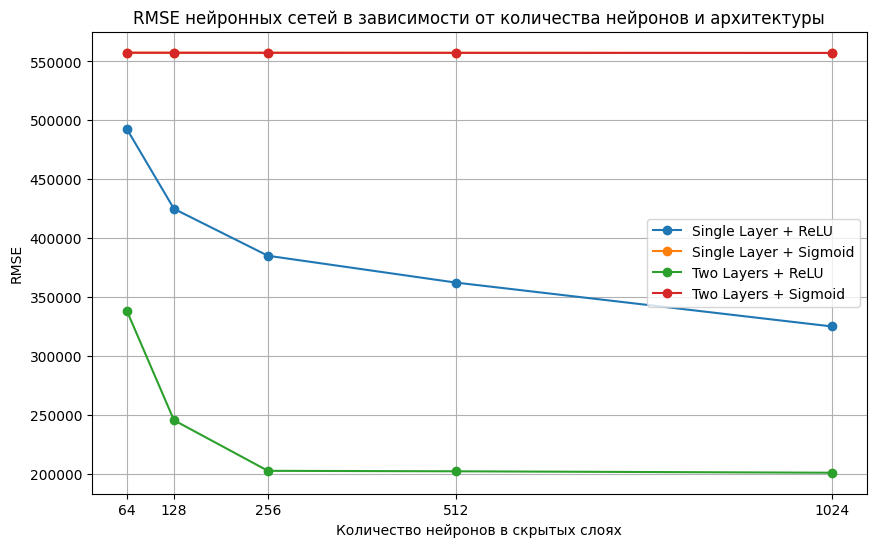

In [35]:
import matplotlib.pyplot as plt

nn_rmses = {k: v for k, v in rmses.items() if 'Нейронка' in k}

neurons = [64, 128, 256, 512, 1024]

rmse_groups = {
    'Single Layer + ReLU': [],
    'Single Layer + Sigmoid': [],
    'Two Layers + ReLU': [],
    'Two Layers + Sigmoid': []
}

for name, rmse in nn_rmses.items():
    if 'ReLU' in name:
        if '*2' in name:
            rmse_groups['Two Layers + ReLU'].append(rmse)
        else:
            rmse_groups['Single Layer + ReLU'].append(rmse)
    elif 'Sigmoid' in name:
        if '*2' in name:
            rmse_groups['Two Layers + Sigmoid'].append(rmse)
        else:
            rmse_groups['Single Layer + Sigmoid'].append(rmse)

for key in rmse_groups:
    sorted_pairs = sorted(zip(neurons, rmse_groups[key]))
    rmse_groups[key] = [rmse for neuron, rmse in sorted_pairs]

plt.figure(figsize=(10, 6))

for label, data in rmse_groups.items():
    if data:
        plt.plot(neurons, data, marker='o', label=label)

plt.xlabel('Количество нейронов в скрытых слоях')
plt.ylabel('RMSE')
plt.title('RMSE нейронных сетей в зависимости от количества нейронов и архитектуры')
plt.xticks(neurons)
plt.legend()
plt.grid(True)
plt.show()

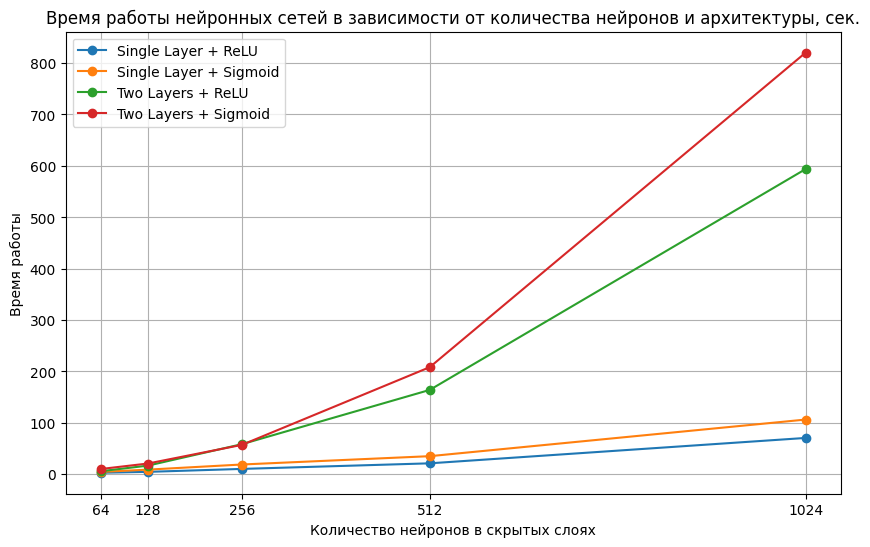

In [36]:
import matplotlib.pyplot as plt

nn_work_time = {k: v for k, v in work_time.items() if 'Нейронка' in k}

neurons = [64, 128, 256, 512, 1024]

rmse_groups = {
    'Single Layer + ReLU': [],
    'Single Layer + Sigmoid': [],
    'Two Layers + ReLU': [],
    'Two Layers + Sigmoid': []
}

for name, rmse in nn_work_time.items():
    if 'ReLU' in name:
        if '*2' in name:
            rmse_groups['Two Layers + ReLU'].append(rmse)
        else:
            rmse_groups['Single Layer + ReLU'].append(rmse)
    elif 'Sigmoid' in name:
        if '*2' in name:
            rmse_groups['Two Layers + Sigmoid'].append(rmse)
        else:
            rmse_groups['Single Layer + Sigmoid'].append(rmse)

for key in rmse_groups:
    sorted_pairs = sorted(zip(neurons, rmse_groups[key]))
    rmse_groups[key] = [rmse for neuron, rmse in sorted_pairs]

plt.figure(figsize=(10, 6))

for label, data in rmse_groups.items():
    if data:
        plt.plot(neurons, data, marker='o', label=label)

plt.xlabel('Количество нейронов в скрытых слоях')
plt.ylabel('Время работы')
plt.title('Время работы нейронных сетей в зависимости от количества нейронов и архитектуры, сек.')
plt.xticks(neurons)
plt.legend()
plt.grid(True)
plt.show()